## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json 
import ast
%matplotlib inline

## Parse log file

###### - Step 1: Convert each text file to a JSON string separately.
###### - Step 2: For each tag, get input values with enter key, return NaN if null.
###### - Step 3: Save as CSV file by tab delimited.

In [42]:
#Check null variable
tagMAC = 'Mac'
tagSession = 'SessionMainMenu'
tagAppName = 'AppName'
tagLogId = 'LogId'
tagEvent = 'Event'
tagItemId = 'ItemId'
tagTime = 'RealTimePlaying'

def check(item, key):
    if key in item:
        return item[key]
    else:
        return 'NA'
    
def parse_log(file):
    f = open('parser/parse_' + file, 'w')
    with open('logfile/'+file,'r') as infile:
        for line in infile: 
            item = json.loads(json.dumps(ast.literal_eval(str(line))))              
            content = check(item, tagMAC) +'\t'+ check(item, tagSession) +'\t'+ check(item, tagAppName) +'\t'+ check(item, tagLogId) +'\t'+ check(item, tagEvent) +'\t'+ check(item, tagItemId) + '\t' + check(item, tagTime) + '\n';
            f.write(content)  
    f.close() 
    
for file in os.listdir('logfile'): 
    if file !='.DS_Store':
        parse_log(file)

###### Display raw data as DataFrame

In [2]:
df0 = pd.read_csv('parser/plogt21.txt', sep="\t", header = None, names = ['MAC', 'SessionMainMenu', 'AppName', 'LogID', 'Event', 'ItemID', 'RealTimePlaying'])
df1 = pd.read_csv('parser/plogt22.txt', sep="\t", header = None, names = df0.columns)
df2 = pd.read_csv('parser/plogt23.txt', sep="\t", header = None, names = df0.columns)
df3 = pd.read_csv('parser/plogt24.txt', sep="\t", header = None, names = df0.columns)
df4 = pd.read_csv('parser/plogt25.txt', sep="\t", header = None, names = df0.columns)
df5 = pd.read_csv('parser/plogt31.txt', sep="\t", header = None, names = df0.columns)
df6 = pd.read_csv('parser/plogt32.txt', sep="\t", header = None, names = df0.columns) 
df = df0.append([df1, df2, df3, df4, df5, df6])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914060 entries, 0 to 256376
Data columns (total 7 columns):
MAC                914060 non-null object
SessionMainMenu    914032 non-null object
AppName            914060 non-null object
LogID              914060 non-null int64
Event              914060 non-null object
ItemID             760938 non-null object
RealTimePlaying    294031 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 55.8+ MB


In [4]:
df.dtypes

MAC                 object
SessionMainMenu     object
AppName             object
LogID                int64
Event               object
ItemID              object
RealTimePlaying    float64
dtype: object

In [5]:
for col in df:
    print(col, '(',len(df[col].unique()),') :', df[col].unique(), '\n')

MAC ( 1693 ) : ['B046FCAC0DC1' 'B046FCAC1A85' 'B046FCB42341' ..., 'B046FCB2D3DE'
 'B046FCB710C6' 'B046FCB626E5'] 

SessionMainMenu ( 101191 ) : ['B046FCAC0DC1:2016:02:12:12:35:13:437'
 'B046FCAC0DC1:2016:02:11:01:01:56:838'
 'B046FCAC0DC1:2016:02:11:01:02:29:258' ...,
 'B046FCB626E5:2016:02:21:22:14:26:538'
 'B046FCB626E5:2016:02:24:18:29:50:318'
 'B046FCB626E5:2016:03:14:17:08:29:140'] 

AppName ( 2 ) : ['VOD' 'IPTV'] 

LogID ( 34 ) : [ 52  40  55  18  54  12  51  42  41 512  50  57  45  56  53 510  44  58
 451  43 411 461 511  48  46 415 413  59 412 414  47 416  49 410] 

Event ( 34 ) : ['StopVOD' 'EnterIPTV' 'NextVOD' 'ChangeModule' 'PlayVOD' 'Standby'
 'StartVOD' 'StopChannel' 'StartChannel' 'EnterDetailVOD' 'EnterVOD'
 'EnterFolderVOD' 'ShowChannelList' 'PreviousVOD' 'PauseVOD' 'SearchVOD'
 'StopTimeshift' 'InsertFavorite' 'ExitChannelList' 'StartTimeshift'
 'GetDRMKeySuccessful' 'ExitSchedule' 'EnterSearchVOD'
 'FavouriteChannelList' 'Show schedule' 'GetDRMKeyFailed' 'ExitEPG'
 '

In [6]:
df.head(10)

,MAC,SessionMainMenu,AppName,LogID,Event,ItemID,RealTimePlaying
0,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,570.3
1,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:01:56:838,IPTV,40,EnterIPTV,NaN,NaN
2,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:02:29:258,VOD,55,NextVOD,100052388,NaN
3,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,18,ChangeModule,NaN,NaN
4,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,54,PlayVOD,100052388,NaN
5,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,40,EnterIPTV,NaN,NaN
6,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,55,NextVOD,100052388,NaN
7,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,3384.6
8,B046FCAC0DC1,B046FCAC0DC1:2016:02:13:17:25:40:373,IPTV,40,EnterIPTV,NaN,NaN
9,B046FCAC0DC1,B046FCAC0DC1:2016:02:14:01:41:40:431,VOD,52,StopVOD,100052388,621.9


### Pre-processing log data

#### Missing numerical values: 'RealTimePlaying'  => replaced with 0

In [7]:
df['RealTimePlaying'] = df['RealTimePlaying'].fillna(0)

#### Missing string values: 'SessionMainMenu', and 'ItemID' => replaced with 'NA' string

In [8]:
df['SessionMainMenu'] = df['SessionMainMenu'].fillna('NA')
df['ItemID'] = df['ItemID'].fillna('NA')

In [9]:
df.head(10)

,MAC,SessionMainMenu,AppName,LogID,Event,ItemID,RealTimePlaying
0,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,570.3
1,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:01:56:838,IPTV,40,EnterIPTV,NA,0.0
2,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:02:29:258,VOD,55,NextVOD,100052388,0.0
3,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,18,ChangeModule,NA,0.0
4,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,54,PlayVOD,100052388,0.0
5,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,40,EnterIPTV,NA,0.0
6,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,55,NextVOD,100052388,0.0
7,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,3384.6
8,B046FCAC0DC1,B046FCAC0DC1:2016:02:13:17:25:40:373,IPTV,40,EnterIPTV,NA,0.0
9,B046FCAC0DC1,B046FCAC0DC1:2016:02:14:01:41:40:431,VOD,52,StopVOD,100052388,621.9


#### Save as .csv file

In [66]:
df.to_csv('data.csv')

## User Information

##### Read file as DataFrame

In [10]:
user_info_df = pd.read_csv('user_info.txt', sep = '\t', header = 0)

##### Create new data with unique user id by summing from the column '#of days'

In [11]:
uidf = user_info_df.groupby('MAC').sum().reset_index()

##### Remove 'FBOX' code from MAC column

In [12]:
uidf = uidf.replace({'FBOX': ''}, regex=True)

In [13]:
uidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 2 columns):
MAC          2664 non-null object
# of days    2664 non-null int64
dtypes: int64(1), object(1)
memory usage: 41.7+ KB


In [14]:
uidf.head(10)

,MAC,# of days
0,001D20ED4ACA,1983
1,001C55007967,1056
2,001C55007A16,923
3,001C55007A8F,1049
4,001C55007B29,1056
5,001C55007BD7,1007
6,001C55007BFF,1014
7,001C55007C49,986
8,001C55007CF7,1018
9,001C55007D35,1037


## Analysis user behavior

##### 

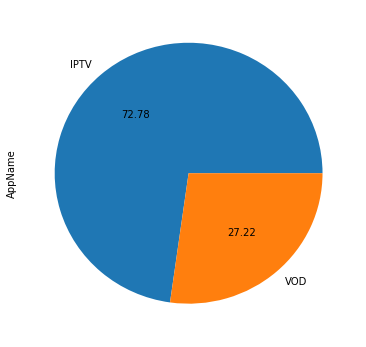

In [15]:
df['AppName'].value_counts().plot.pie(figsize=(6, 6),subplots=True, autopct='%.2f')  
plt.savefig('image/AppNamePie')

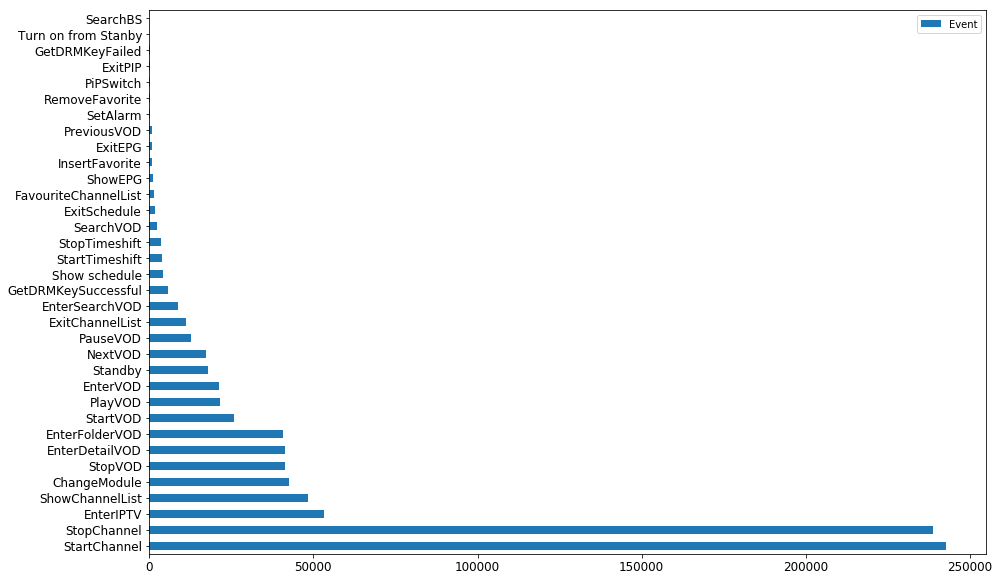

In [16]:
df['Event'].value_counts().plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12, stacked=True,)
plt.savefig('image/Eventbar')

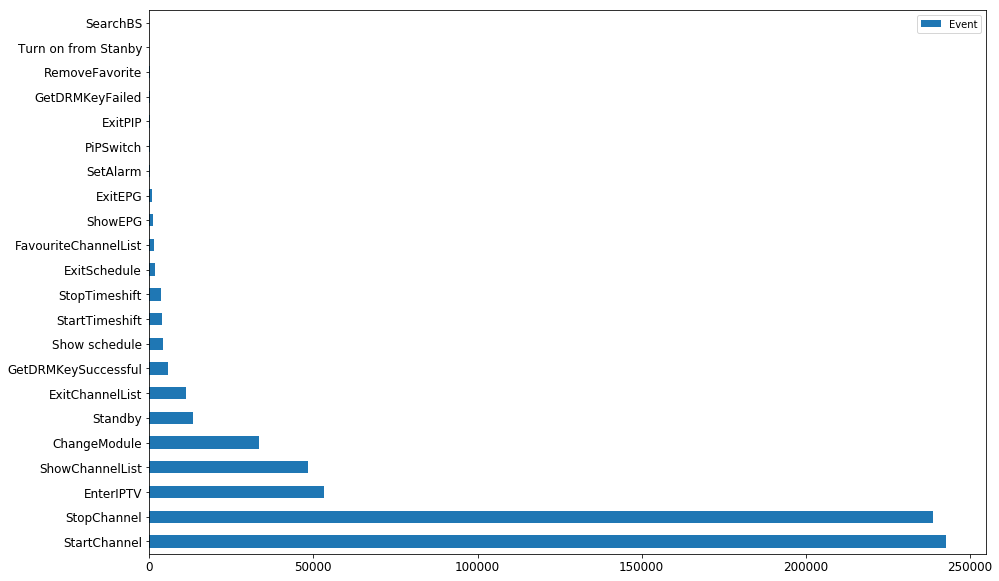

In [17]:
iptvdf = df.loc[df['AppName'].isin(['IPTV'])]
iptvdf['Event'].value_counts().plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12, stacked=True,)
plt.savefig('image/IPTVEventbar')

In [18]:
iptvdf[iptvdf['RealTimePlaying']>0]#.sort_values(by=['RealTimePlaying'])

,MAC,SessionMainMenu,AppName,LogID,Event,ItemID,RealTimePlaying
14,B046FCAC0DC1,B046FCAC0DC1:2016:02:14:13:48:02:456,IPTV,42,StopChannel,158,6.657
15,B046FCAC0DC1,B046FCAC0DC1:2016:02:17:18:29:12:705,IPTV,42,StopChannel,52,11.327
32,B046FCAC0DC1,B046FCAC0DC1:2016:02:21:22:11:17:200,IPTV,42,StopChannel,52,9.468
33,B046FCAC0DC1,B046FCAC0DC1:2016:02:21:22:22:08:526,IPTV,42,StopChannel,16,6.304
40,B046FCAC0DC1,B046FCAC0DC1:2016:02:21:22:11:17:200,IPTV,42,StopChannel,52,7.536
83,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:03:852,IPTV,42,StopChannel,158,99747.881
84,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:34:56:559,IPTV,42,StopChannel,158,10.415
109,B046FCAC0DC1,B046FCAC0DC1:2016:02:17:21:48:17:443,IPTV,42,StopChannel,52,11999.164
112,B046FCAC0DC1,B046FCAC0DC1:2016:02:17:03:00:34:105,IPTV,42,StopChannel,125,8.986
115,B046FCAC0DC1,B046FCAC0DC1:2016:02:21:22:11:17:200,IPTV,42,StopChannel,52,17.488


In [19]:
iptvTotalTimedf = pd.DataFrame(iptvdf.groupby(by=['MAC'])['RealTimePlaying'].sum())

In [32]:
iptvTotalTimedf.to_csv('iptvTotalTimedf.csv')

In [76]:
iptvTotalTimedf = pd.read_csv('iptvTotalTimedf.csv', sep = ',', header = 0)
iptvTotalTimedf = iptvTotalTimedf.rename(columns = {'RealTimePlaying':'TotalTimePlaying'})

In [77]:
diptvdf = pd.merge(iptvTotalTimedf, uidf, on='MAC')
diptvdf.to_csv('diptv.csv')

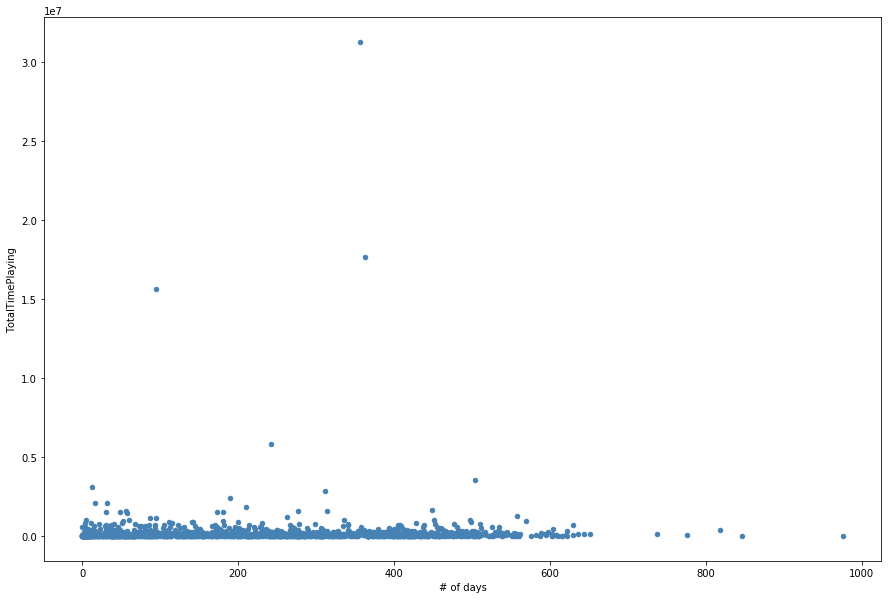

In [78]:
diptvdf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='steelblue'); 

#### Move noisy

In [79]:
diptvdf = diptvdf[diptvdf['TotalTimePlaying'] < 1000000]

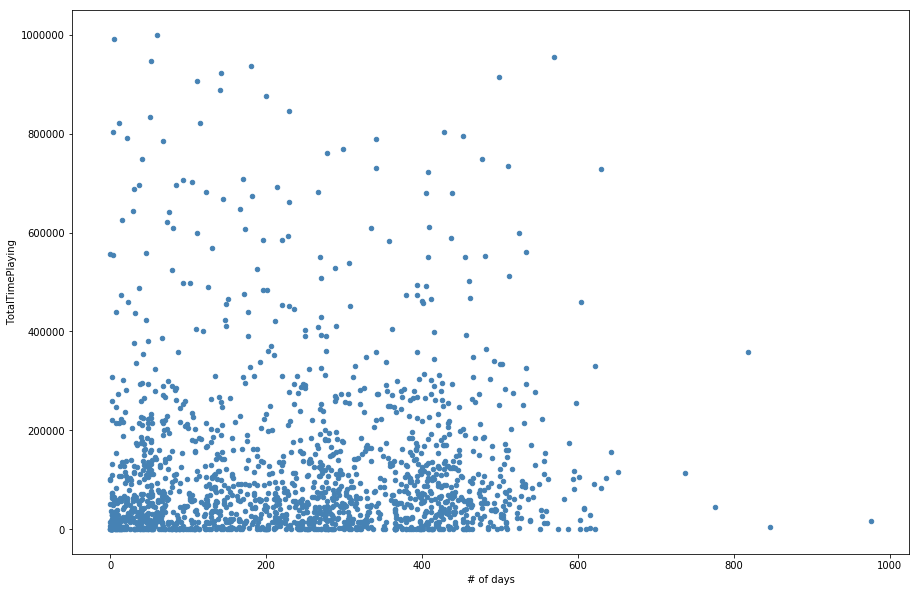

In [80]:
diptvdf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='steelblue'); 
plt.savefig('image/diptv')

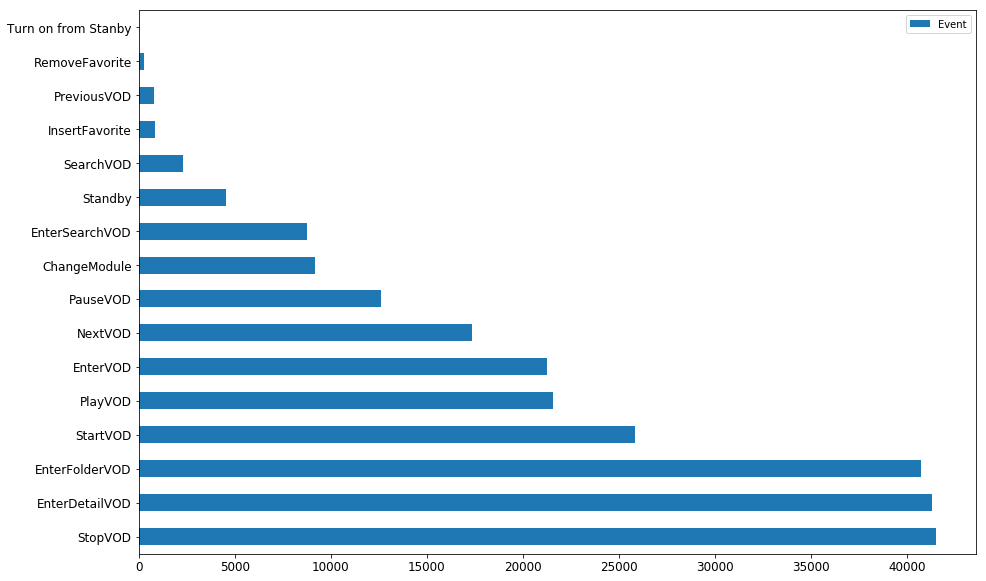

In [39]:
voddf = df.loc[df['AppName'].isin(['VOD'])]
voddf['Event'].value_counts().plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12, stacked=True, color ='')
plt.savefig('image/VODEventbar')

In [40]:
voddf[voddf['RealTimePlaying']>0].sort_values(by=['RealTimePlaying']).head(10)

,MAC,SessionMainMenu,AppName,LogID,Event,ItemID,RealTimePlaying
769,B046FCABEFB4,B046FCABEFB4:2016:02:24:19:59:08:373,VOD,52,StopVOD,100023519,0.3
159301,B046FCAE66ED,B046FCAE66ED:2016:02:12:20:16:05:892,VOD,52,StopVOD,100052494,0.3
45422,B046FCB5E825,B046FCB5E825:2016:02:23:17:44:20:833,VOD,52,StopVOD,100048400,0.3
45429,B046FCB5E825,B046FCB5E825:2016:02:26:18:16:13:340,VOD,52,StopVOD,100048400,0.3
50902,B046FCB369E9,B046FCB369E9:2016:02:14:12:55:38:307,VOD,52,StopVOD,100038160,0.3
115940,B046FCAA1659,B046FCAA1659:2016:02:19:18:23:58:397,VOD,52,StopVOD,100035063,0.3
134129,B046FCB16635,B046FCB16635:2016:02:16:17:28:22:202,VOD,52,StopVOD,100035854,0.3
124416,B046FCAE2D74,B046FCAE2D74:2016:02:12:13:47:21:425,VOD,52,StopVOD,100024880,0.3
4960,B046FCB3690D,B046FCB3690D:2016:02:17:16:52:15:323,VOD,52,StopVOD,100051734,0.3
145555,B046FCB5DDA4,B046FCB5DDA4:2016:02:28:10:16:55:832,VOD,52,StopVOD,100047174,0.3


In [41]:
vodTotalTimedf = pd.DataFrame(voddf.groupby(by=['MAC'])['RealTimePlaying'].sum())
vodTotalTimedf.to_csv('vodTotalTimedf.csv')

In [89]:
vodTotalTimedf = pd.read_csv('vodTotalTimedf.csv', sep = ',', header = 0)
vodTotalTimedf = vodTotalTimedf.rename(columns = {'RealTimePlaying':'TotalTimePlaying'})

In [90]:
dvoddf = pd.merge(vodTotalTimedf, uidf, on='MAC')
dvoddf.to_csv('diptv.csv')

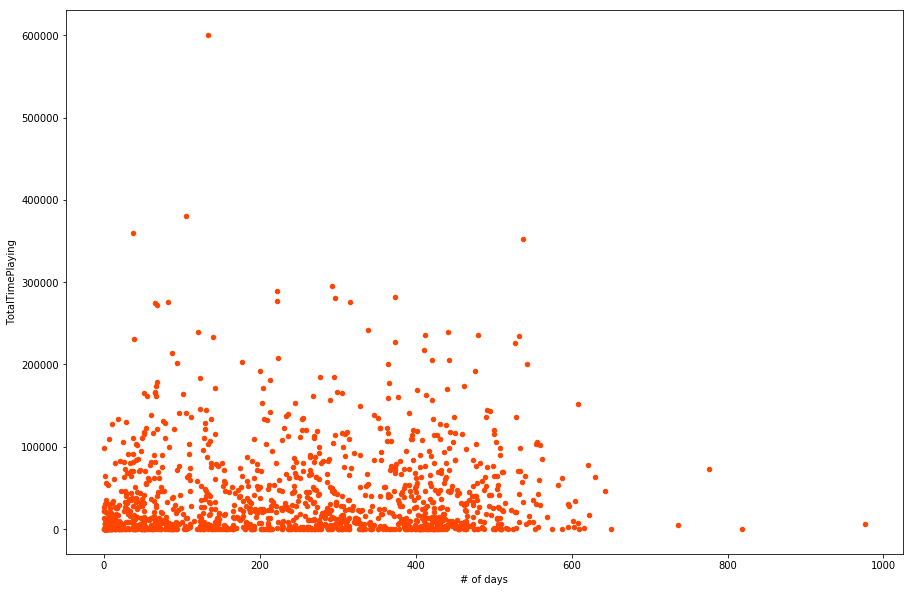

In [91]:
dvoddf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='orangered'); 

In [93]:
dvoddf = dvoddf[dvoddf['TotalTimePlaying'] < 200000]

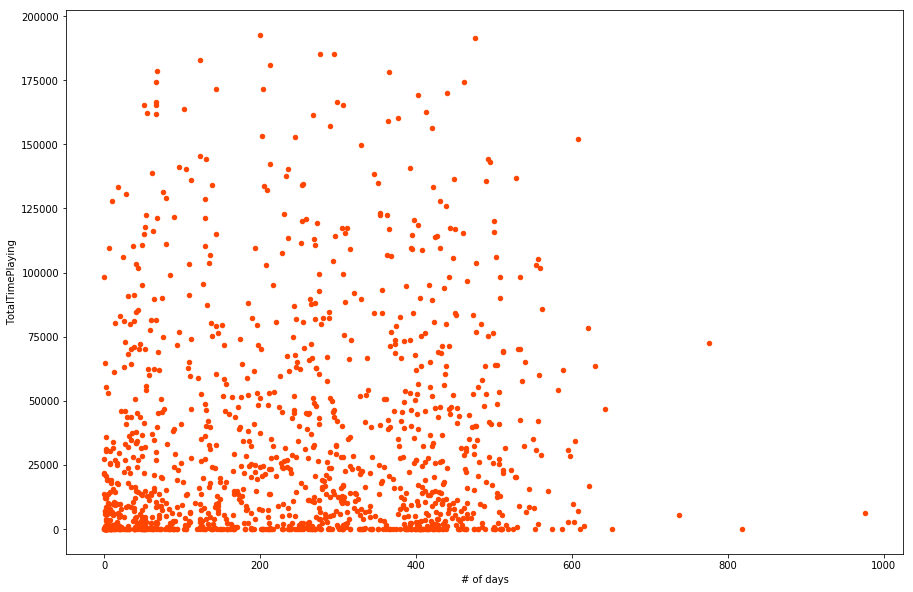

In [94]:
dvoddf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='orangered'); 
plt.savefig('image/dvod')

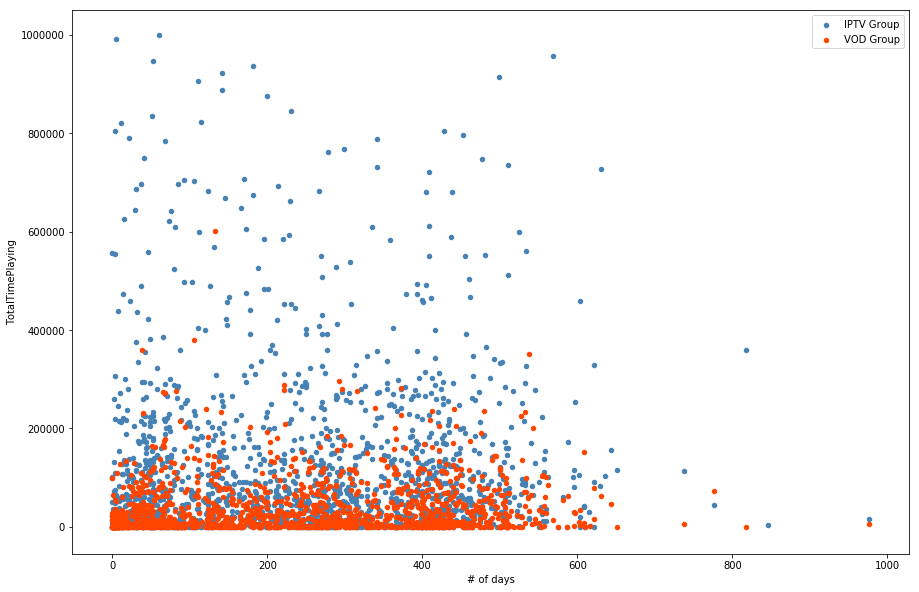

In [92]:
ax = diptvdf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='steelblue', label='IPTV Group');
dvoddf.plot.scatter(x='# of days', y='TotalTimePlaying', figsize=(15, 10), legend=True, color='orangered', label='VOD Group', ax=ax);
plt.savefig('image/diptvvod')